In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D

from keras_tuner import RandomSearch, HyperParameters

In [3]:
train_df = pd.read_csv('fashion-mnist_train.csv')

print(train_df.shape)
train_df.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df = pd.read_csv('fashion-mnist_test.csv')

print(test_df.shape)
test_df.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Labels

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

In [8]:
train_data = np.array(train_df, dtype = 'float64')
test_data = np.array(test_df, dtype = 'float64')

In [10]:
X_train = train_data[:, 1:] / 255
y_train = train_data[:, 0]

X_test = test_data[:, 1:] / 255
y_test = test_data[:, 0]

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [14]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover', 
               'Dress', 
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

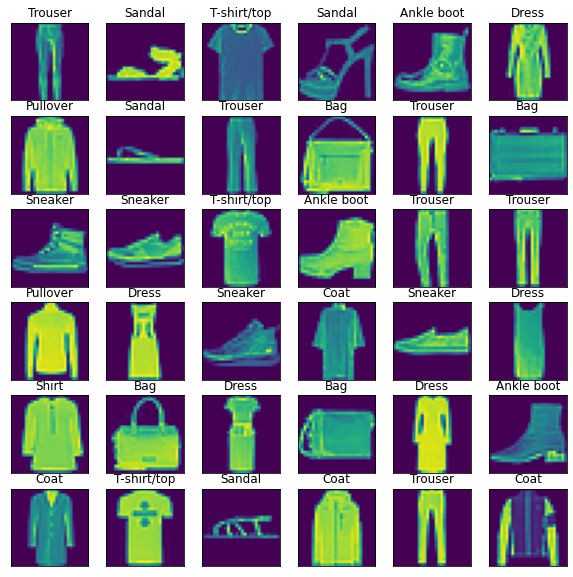

In [15]:
plt.figure(figsize = (10, 10))

for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28, 28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
    
plt.show()

# Model

In [17]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows, image_cols, 1)

In [19]:
X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)
X_val = X_val.reshape(X_val.shape[0], *image_shape)

In [22]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = 3, activation = 'relu', input_shape = image_shape),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),
    Flatten(),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [24]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [27]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = 75, verbose = 1, validation_data = (X_val, y_val))

Epoch 1/75
12/12 [==============================] - 1s 74ms/step - loss: 0.2382 - accuracy: 0.9150 - val_loss: 0.2763 - val_accuracy: 0.9043
Epoch 2/75
12/12 [==============================] - 1s 70ms/step - loss: 0.2400 - accuracy: 0.9134 - val_loss: 0.2756 - val_accuracy: 0.9033
Epoch 3/75
12/12 [==============================] - 1s 70ms/step - loss: 0.2378 - accuracy: 0.9156 - val_loss: 0.2779 - val_accuracy: 0.9038
Epoch 4/75
12/12 [==============================] - 1s 70ms/step - loss: 0.2349 - accuracy: 0.9165 - val_loss: 0.2776 - val_accuracy: 0.9021s - loss: 0.2358 - accuracy: 0. - ETA: 0s - loss: 0.2337 - accuracy: 0.91
Epoch 5/75
12/12 [==============================] - 1s 69ms/step - loss: 0.2335 - accuracy: 0.9165 - val_loss: 0.2759 - val_accuracy: 0.9044
Epoch 6/75
12/12 [==============================] - 1s 69ms/step - loss: 0.2320 - accuracy: 0.9178 - val_loss: 0.2765 - val_accuracy: 0.9030
Epoch 7/75
12/12 [==============================] - 1s 70ms/step - loss: 0.2319 -

Epoch 58/75
12/12 [==============================] - 1s 70ms/step - loss: 0.1807 - accuracy: 0.9352 - val_loss: 0.2569 - val_accuracy: 0.9113
Epoch 59/75
12/12 [==============================] - 1s 70ms/step - loss: 0.1805 - accuracy: 0.9356 - val_loss: 0.2557 - val_accuracy: 0.9119
Epoch 60/75
12/12 [==============================] - 1s 70ms/step - loss: 0.1778 - accuracy: 0.9371 - val_loss: 0.2552 - val_accuracy: 0.9121
Epoch 61/75
12/12 [==============================] - 1s 70ms/step - loss: 0.1787 - accuracy: 0.9359 - val_loss: 0.2557 - val_accuracy: 0.9118
Epoch 62/75
12/12 [==============================] - 1s 70ms/step - loss: 0.1772 - accuracy: 0.9373 - val_loss: 0.2548 - val_accuracy: 0.9118
Epoch 63/75
12/12 [==============================] - 1s 70ms/step - loss: 0.1747 - accuracy: 0.9380 - val_loss: 0.2546 - val_accuracy: 0.9128
Epoch 64/75
12/12 [==============================] - 1s 69ms/step - loss: 0.1753 - accuracy: 0.9374 - val_loss: 0.2582 - val_accuracy: 0.9118
Epoch 

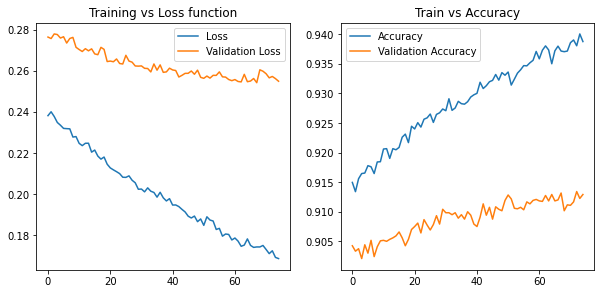

In [29]:
plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.title('Training vs Loss function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.title('Train vs Accuracy')

plt.show()

In [30]:
score = model.evaluate(X_test, y_test)
print('Test Loss: {:.4f}'.format(score[0]))
print('Test Accuracy: {:.4f}'.format(score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.2347 - accuracy: 0.9184
Test Loss: 0.2347
Test Accuracy: 0.9184


In [49]:
prediction = np.argmax(model.predict(X_test), axis = -1)

y_true = test_df.iloc[:, 0]

target_names = ['Class {}'.format(i) for i in range(len(class_names))]

print(classification_report(y_true, prediction))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1000
           1       0.98      0.99      0.99      1000
           2       0.89      0.86      0.88      1000
           3       0.91      0.94      0.92      1000
           4       0.88      0.90      0.89      1000
           5       0.98      0.97      0.98      1000
           6       0.79      0.76      0.77      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



# Hyperparamter Tuning

In [51]:
def build_model(hp):
    model = Sequential([
        Conv2D(
            filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),
            kernel_size = hp.Choice('conv_1_kernel', values = [3, 5]),
            activation = 'relu',
            input_shape = image_shape
        ),
        Conv2D(
            filters = hp.Int('conv_2_filter', min_value = 32, max_value = 64, step = 16),
            kernel_size = hp.Choice('conv_2_kernel', values = [3, 5]),
            activation = 'relu',
        ),
        MaxPooling2D(pool_size = 2),
        Dropout(0.2),
        Flatten(),
        Dense(units = hp.Int('dense_1_units', min_value = 32, max_value = 64, step = 16), 
              activation = 'relu'),
        Dense(10, activation = 'softmax')
    ])
    
    model.compile(optimizer = keras.optimizers.Adam(learning_rate = hp.Choice('lr', values = [1e-2, 1e-3])),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model

In [54]:
tuner = RandomSearch(build_model,
                     objective = 'val_accuracy',
                     max_trials = 5,
                     directory = 'cnn_output',
                     project_name = 'FashionMNIST')

In [55]:
tuner.search(X_train, y_train, epochs = 3, validation_data = (X_val, y_val))

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.9102500081062317

Best val_accuracy So Far: 0.9102500081062317
Total elapsed time: 00h 02m 17s
INFO:tensorflow:Oracle triggered exit


In [56]:
model = tuner.get_best_models(num_models = 1)[0]

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        115248    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5808)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                185888    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [58]:
model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), initial_epoch = 3)

Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2146 - accuracy: 0.9219 - val_loss: 0.2441 - val_accuracy: 0.9122
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1868 - accuracy: 0.9313 - val_loss: 0.2625 - val_accuracy: 0.9077
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1642 - accuracy: 0.9402 - val_loss: 0.2371 - val_accuracy: 0.9218
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1492 - accuracy: 0.9458 - val_loss: 0.2406 - val_accuracy: 0.9218
Epoch 8/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1315 - accuracy: 0.9507 - val_loss: 0.2488 - val_accuracy: 0.9168
Epoch 9/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1195 - accuracy: 0.9555 - val_loss: 0.2819 - val_accuracy: 0.9142
Epoch 10/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1091 - accuracy: 0.9592 - val_loss: 0.2679 - val_accuracy

In [59]:
y_pred = np.argmax(model.predict(X_test), axis = -1)

In [60]:
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

         0.0     0.8585    0.8800    0.8691      1000
         1.0     0.9909    0.9830    0.9869      1000
         2.0     0.8920    0.8670    0.8793      1000
         3.0     0.9393    0.9130    0.9260      1000
         4.0     0.8752    0.9050    0.8899      1000
         5.0     0.9811    0.9850    0.9830      1000
         6.0     0.7845    0.7900    0.7872      1000
         7.0     0.9541    0.9780    0.9659      1000
         8.0     0.9919    0.9790    0.9854      1000
         9.0     0.9817    0.9640    0.9728      1000

    accuracy                         0.9244     10000
   macro avg     0.9249    0.9244    0.9246     10000
weighted avg     0.9249    0.9244    0.9246     10000

